<a href="https://colab.research.google.com/github/11jolek11/BigData/blob/classification/List6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [3]:
iris = datasets.load_iris(as_frame=True)
wine = datasets.load_wine(as_frame=True)
kddcup = datasets.fetch_kddcup99(as_frame=True)

In [4]:
lda_pipeline = Pipeline(
    [
      ('scaler', StandardScaler()),
      ('lda_dim_reduction', LDA(n_components=2)),
    ]
)

In [5]:
iris_lda = pd.DataFrame(data=lda_pipeline.fit_transform(iris.data, iris.target), columns=['lda1', 'lda2'])

<Axes: xlabel='lda1', ylabel='lda2'>

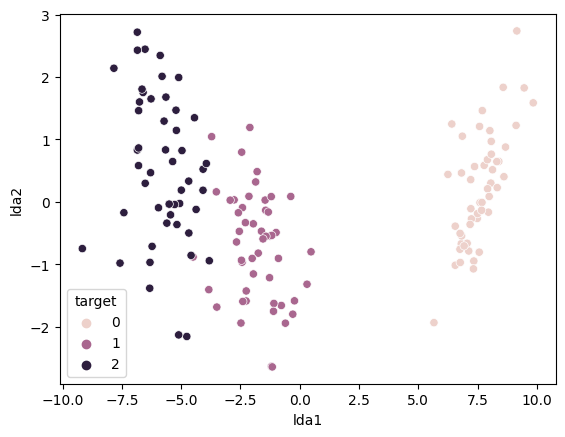

In [6]:
sns.scatterplot(data=iris_lda, x='lda1', y='lda2', hue=iris.target)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(iris_lda, iris.target, test_size=0.33)

In [56]:
# param_grid = {'n_neighbors': np.arange(3, 6)}

# knn_cv = GridSearchCV(knn, param_grid, cv=5)

# knn_cv.fit(X_train, Y_train)

(array([0, 1, 2]), array([17, 17, 16]))

In [61]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, Y_train)

Y_predict = knn.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_predict)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
# disp.plot()

f1 = f1_score(Y_test, Y_predict, average='micro')

# roc_score = roc_curve(Y_test, knn.predict_proba(X_test))
# roc_curve works only for one class! Try to test one vs rest strategy!